# Happywhale - CS795 Project 1
***
Old Dominion University

2/26/2022
#### Authors: Raphael J. Sandor, Xiangrui Xu


# Imports

In [1]:
import os
import keras
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from keras.optimizers import adam_v2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
import PIL
from PIL import Image
import warnings
import pathlib
import tensorflow as tf
from pathlib import Path
warnings.filterwarnings('ignore')
%matplotlib inline

# Exploring the dataset

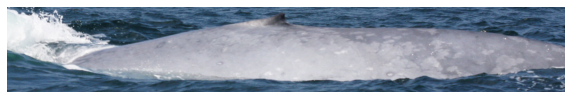

In [2]:
train_df = pd.read_csv('train.csv')
TRAIN_IMAGES_DIR = Path("./train_images")
TEST_IMAGES_DIR = Path("./test_images")
train_images = list(TRAIN_IMAGES_DIR.glob('./*'))
img = PIL.Image.open(str(train_images[1000]))
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
trainImgCnt = len(list(TRAIN_IMAGES_DIR.glob('*.jpg')))
testImgCnt = len(list(TEST_IMAGES_DIR.glob('*.jpg')))
print("Train image count: " + str(trainImgCnt))
print("Test image count: " + str(testImgCnt))

Train image count: 51033
Test image count: 27956


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51033 entries, 0 to 51032
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image          51033 non-null  object
 1   species        51033 non-null  object
 2   individual_id  51033 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [5]:
train_df.describe()

,image,species,individual_id
count,51033,51033,51033
unique,51033,30,15587
top,00021adfb725ed.jpg,bottlenose_dolphin,37c7aba965a5
freq,1,9664,400


In [6]:
train_df.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


## List of unique species 

In [7]:
species = train_df['species']

In [48]:
unique_species = pd.unique(species) # returns numpy.ndarray 
print(unique_species)

['melon_headed_whale' 'humpback_whale' 'false_killer_whale' 'bottlenose_dolphin' 'beluga' 'minke_whale' 'fin_whale' 'blue_whale' 'gray_whale' 'southern_right_whale' 'common_dolphin' 'killer_whale'
 'pilot_whale' 'dusky_dolphin' 'long_finned_pilot_whale' 'sei_whale' 'spinner_dolphin' 'cuviers_beaked_whale' 'spotted_dolphin' 'globis' 'brydes_whale' 'commersons_dolphin' 'white_sided_dolphin'
 'short_finned_pilot_whale' 'rough_toothed_dolphin' 'pantropic_spotted_dolphin' 'pygmy_killer_whale' 'frasiers_dolphin']


# Whales and Dolphins

In [58]:
# Note that the dataset includes some typo mistakes mistakes.
# Not sure if I should correct them or not? 
train_df['species'].replace('bottlenose_dolpin', 'bottlenose_dolphin', inplace=True)
train_df['species'].replace('kiler_whale', 'killer_whale', inplace=True)
train_df['species'][(train_df['species'] =="pilot_whale") | (train_df['species'] =="globis" )]='short_finned_pilot_whale'
print("Total species after :",len(train_df.species.unique()))

whales = ['humpback_whale','beluga','minke_whale', 'fin_whale', 'blue_whale', 'gray_whale',
          'southern_right_whale','sei_whale', 'cuviers_beaked_whale', 'brydes_whale']

dolphins = ['melon_headed_whale','false_killer_whale', 'bottlenose_dolphin', 'common_dolphin', 
            'dusky_dolphin', 'killer_whale', 'long_finned_pilot_whale', 'spinner_dolphin', 
            'spotted_dolphin','commersons_dolphin', 'white_sided_dolphin', 'short_finned_pilot_whale',
            'rough_toothed_dolphin', 'pantropic_spotted_dolphin', 'frasiers_dolphin', 'pygmy_killer_whale']

Total species after : 26


In [59]:
whale_df = train_df[train_df['species'].str.contains('|'.join(whales))]
dolphin_df = train_df[train_df['species'].str.contains('|'.join(dolphins))]

In [60]:
## lets check speiceis in visually
# Nikhil Jothi Prakash 
# Works cited: https://www.kaggle.com/nikhiljothiprakash/happy-whale-and-dolphin
plt.figure(figsize=(16, 12))
plt.rcParams["font.size"] = 16
plt.barh(train_df["species"].value_counts().sort_values(ascending=True).index,train_df["species"].value_counts().sort_values(ascending=True),tick_label = train_df["species"].value_counts().sort_values(ascending=True).index)
plt.show()

Total species after : 26


In [53]:
print(whale_df)
print(dolphin_df)

                    image               species individual_id  isWhale
1      000562241d384d.jpg        humpback_whale  1a71fbb72250        1
4      00087baf5cef7a.jpg        humpback_whale  8e5253662392        1
6      000be9acf46619.jpg                beluga  afb9b3978217        1
7      000bef247c7a42.jpg        humpback_whale  444d8894ccc8        1
8      000c3d63069748.jpg                beluga  df94b15285b9        1
...                   ...                   ...           ...      ...
51027  fff603f5af8614.jpg             fin_whale  40fe65946167        1
51028  fff639a7a78b3f.jpg                beluga  5ac053677ed1        1
51029  fff8b32daff17e.jpg  cuviers_beaked_whale  1184686361b3        1
51030  fff94675cc1aef.jpg            blue_whale  5401612696b9        1
51031  fffbc5dd642d8c.jpg                beluga  4000b3d7c24e        1

[25509 rows x 4 columns]
                    image                  species individual_id  isWhale
0      00021adfb725ed.jpg       melon_headed_wha

In [55]:
print("Species of whales: " + str(len(whales)))
print("Species of dolphins: " + str(len(dolphins)))

Species of whales: 10
Species of dolphins: 16


In [56]:
print("Number of whales: " + str(whale_df.shape[0]))
print("Number of dolphins: " + str(dolphin_df.shape[0]))

Number of whales: 25509
Number of dolphins: 25146


In [13]:
# now lets classify on whales.
print(train_df.species.isin(whale_df.species).astype(int))
train_df['isWhale'] = train_df.species.isin(whale_df.species).astype(int)
train_data = []

0        0
1        1
2        0
3        0
4        1
        ..
51028    1
51029    1
51030    1
51031    1
51032    0
Name: species, Length: 51033, dtype: int64


In [14]:
# Borrowed from 
# https://www.kaggle.com/samir95/species-classification
_, dev, _ , _ = train_test_split(train_df, train_df['isWhale'], test_size=0.1)

dev.shape

(5104, 4)

# Resize images
See if image resizing is effective

In [15]:
import fastai
from fastai.vision.all import *
from fastai.basics import *
from fastai.data.all import *

from fastai.vision.core import *
import fastbook
fastbook.setup_book() 
pd.options.mode.chained_assignment = None  # default='warn'
resizedPath = Path("train_images256_256")
dev['imagePath'] = dev['image'].apply(lambda f: TRAIN_IMAGES_DIR/f)

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                   get_x=ColReader('imagePath'),
                   get_y=lambda r: r['isWhale'],
                   splitter=RandomSplitter(seed=42),
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224))
#dblock.summary(dev)
dsets = dblock.datasets(dev)
dls = dblock.dataloaders(dev)

# Start CNN Learning

SuggestedLRs(valley=0.0008317637839354575)

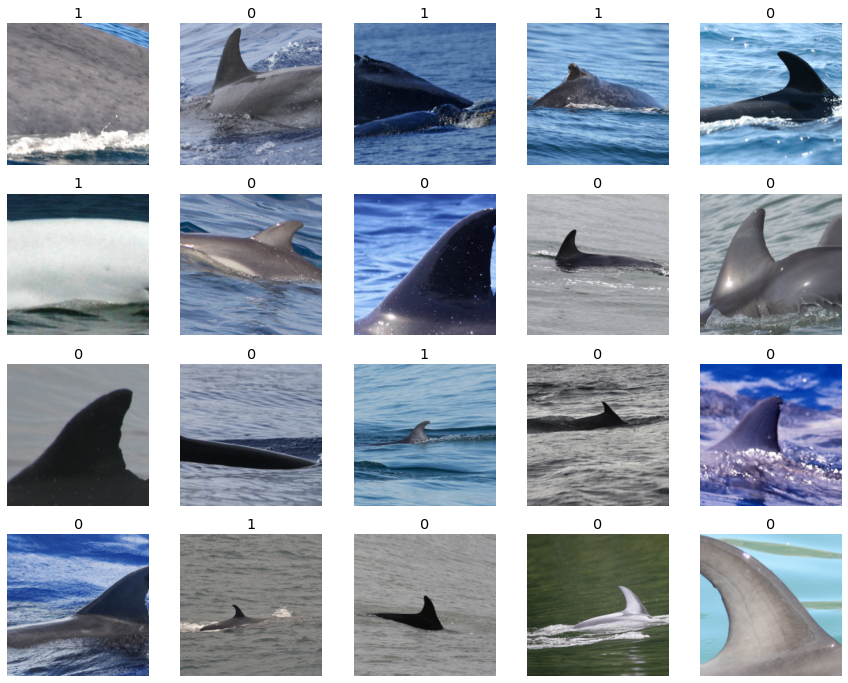

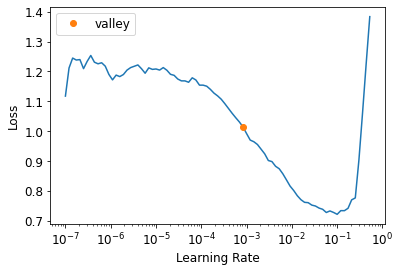

In [16]:
dls.show_batch(max_n=20)
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])
learn.lr_find()

# Fine Tune and Improve

In [17]:
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.416725,0.192254,0.941176,0.058824,01:28


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.223900,0.126471,0.967647,0.032353,01:28
1,0.138555,0.077011,0.971569,0.028431,01:27


In [18]:
learn.freeze()
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.104051,0.118349,0.963726,0.036275,01:25
1,0.089721,0.127666,0.957843,0.042157,01:26
2,0.066247,0.076760,0.978431,0.021569,01:27


SuggestedLRs(valley=4.365158383734524e-05)

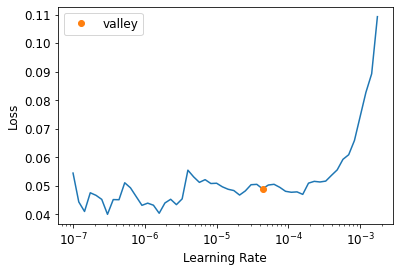

In [19]:
learn.unfreeze()
learn.lr_find()

In [20]:
learn.fit_one_cycle(6, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.051714,0.076173,0.977451,0.022549,01:28
1,0.056436,0.081528,0.977451,0.022549,01:28
2,0.043682,0.068569,0.979412,0.020588,01:28
3,0.042439,0.067560,0.978431,0.021569,01:28
4,0.036111,0.064698,0.979412,0.020588,01:28
5,0.032119,0.070191,0.978431,0.021569,01:26


# Examine how it does based on IDs.

#### using research by Andre C Ferreira as a starting point on this venture
##### https://github.com/AndreCFerreira/Bird_individualID/blob/master/Train_CNN/TRAIN_CNN.ipynb

Lets explore how many individuals we are working with in this

In [21]:
labels = train_df["individual_id"].unique()
labels = {ind: idx for idx, ind in enumerate(labels)}

In [ ]:
# break up our data into two sets training and validation.
